<a id="index"></a>
# Index

Initializing
- [Defining the company ticker](#ticker)
- [Python Imports](#imports)
- [Remove previous files](#remove_previous_files)

Importing Data
- [Importing data from Financial Modeling Prep](#fmp_import)
- [Exploring the downloaded data](#fmp_explore)
- [Transforming the downloaded data to a dataframe](#fmp_to_df)


Processing Data
- [[fundamentals_df] Creating a custom Dataframe from the downloaded Data](#fundamentals_df)
    - [Variables used by all dataframes](#fundamentals_variables)
    - [[fundamentals_financials_df] Financial Statements df](#fundamentals_financials_df)
    - [[fundamentals_metrics_df] Metrics df](#fundamentals_metrics_df)
    - [[fundamentals_ratios_df ] Ratios df](#fundamentals_ratios_df)


- [[graph_df] Creating a new separate dataframe for the graphs](#graph_df)
    - [[Graph] Balance Sheet total USD](#bs_total)
    - [[Graph] Balance Sheet percentage amount](#bs_percentage)
    - [[Graph] Income Statement USD amount](#is_total)
    - [[Graph] Income Statement percentage amount graph](#is_percentage)
    - [[Graph] Equity distribution, reinvestment, and debt payment graph](#equity_uses)
    - [[Graph] Cash Flow Statement](#CF_graph)


- [Formating financial statements for the PDF Table Output](#pdf_table)
    - [[table_is_df] Income Statement Dataframe ](#table_is_df)
    - [[table_cs_is_df] Common Size Income Statement Dataframe ](#table_cs_is_df)
    - [[table_bs_df] Balance Sheet Dataframe ](#table_bs_df)
    - [[table_cs_bs_df] Common Size Balance Sheet Dataframe ](#table_cs_bs_df)
    - [[table_cf_df] Cash Flow Statement Dataframe ](#table_cf_df)
    - [[table_metrics_df] Metrics Dataframe ](#table_metrics_df)


Outputs
- [Exporting as a PDF file](#export_pdf)
    - [Formating data for the PDF](#formating_pdf)
    - [Defining Classes ](#defining_classes_pdf)
    - [Instantiation of Class  ](#class_instantiation_pdf)
    - [Page 1: Company Description ](#page1_pdf)
    - [Page 2: Company Metrics ](#page2_pdf)
    - [Page 3: Financial Statements ](#page3_pdf)
    - [Page 4: Financial Statement Graphs ](#page4_pdf)
    - [Page 5: Common Size Financial Statement Graphs](#page5_pdf)
    - [Save output as PDF ](#save_output_pdf)

To Do's:
- Export to excel

In [1]:
# Linter Code:

# Load Once
#%load_ext pycodestyle_magic

# Load where linting
#%%pycodestyle

# Automatic Code formater
# pip3 install nb_black
# %load_ext nb_black

<a id="ticker"></a>
### Defining the company ticker [*](#index)

In [2]:
# Define the company ticker
company = "AAPL"

<a id="imports"></a>
### Python Imports [*](#index)

In [3]:
# Python Imports
import os
import requests
import pandas as pd
import plotly.graph_objects as go
import dataframe_image as dfi
import datetime as dt
from fpdf import FPDF
from PIL import Image

# Display pandas dataframes in full form
pd.set_option("display.max_rows", None, "display.max_columns", None)


<a id="remove_previous_files"></a>
### Remove previous files [*](#index)

In [4]:
# Remove previous files
# To ensure report does not contain files from another company

paths = ("images/output/bs.png",
         "images/output/cs_bs.png",
         "images/output/is.png",
         "images/output/cs_is.png",
         "images/output/equity_uses.png",
         "images/output/cash_flow.png",
         "images/output/cs_is_table.png",
         "images/output/cash_flow.png",
         "images/output/is_table.png",
         "images/output/bs_table.png",
         "images/output/cs_bs_table.png",
         "images/output/cf_table.png",
         "images/output/main_metrics_table.png",
         "images/output/company_image.png")

for path in paths:
    if os.path.exists(path):
        print(path+":File exists")
        os.remove(path)
        print(path+":Removed Successfuly")
    else:
        print(path+" : File does not exist")


images/output/bs.png : File does not exist
images/output/cs_bs.png : File does not exist
images/output/is.png : File does not exist
images/output/cs_is.png : File does not exist
images/output/equity_uses.png : File does not exist
images/output/cash_flow.png : File does not exist
images/output/cs_is_table.png : File does not exist
images/output/cash_flow.png : File does not exist
images/output/is_table.png : File does not exist
images/output/bs_table.png : File does not exist
images/output/cs_bs_table.png : File does not exist
images/output/cf_table.png : File does not exist
images/output/main_metrics_table.png : File does not exist
images/output/company_image.png : File does not exist


<a id="fmp_import"></a>
### Importing data from Financial Modeling Prep [*](#index)

In [5]:
# Importing data from Financial Modeling Prep

# Data provided by Financial Modeling Prep
# https://financialmodelingprep.com/developer/docs/

# FMP API Key
api = os.environ.get("token_finmodelprep")

website = 'https://financialmodelingprep.com/api/v3'

# Data to Import
IS = requests.get(f'{website}/income-statement/{company}?apikey={api}').json()
BS = requests.get(f'{website}/balance-sheet-statement/{company}?apikey={api}').json()
CF = requests.get(f'{website}/cash-flow-statement/{company}?apikey={api}').json()
Ratios = requests.get(f'{website}/ratios/{company}?apikey={api}').json()
Metrics = requests.get(f'{website}/key-metrics/{company}?apikey={api}').json()
Profile = requests.get(f'{website}/profile/{company}?apikey={api}').json()
Raiting = requests.get(f'{website}/rating/{company}?apikey={api}').json()
Surprises = requests.get(f'{website}/earnings-surprises/{company}?apikey={api}').json()

# Download Company Image

# Link for the company image
imageurl = Profile[0]['image']

# Save the company image
r = requests.get(str(imageurl))
with open("images/output/company_image.png", "wb") as f:
    f.write(r.content)

# To get a list of all available tickers use the following:
#symbol = requests.g et(f'{website}/stock/list?apikey={api}').json()


<a id="fmp_explore"></a>
### Exploring the Data [*](#index)

In [40]:
# Exploring the Data:

# Data is currently stored as a list:
# type(<variable_name>)  # To check

# Company Data variable:
#Profile
#company_description = Profile[0]['description']
#company_description

# Financial Statments variable:
#BS
#CF
#IS

# Key Performance Indicators:
#Ratios
#Metrics

# Other Metrics:
#Raitings
#Surprises

<a id="fmp_to_df"></a>
### Transforming the downloaded data to a dataframe[*](#index)

In [41]:
# Exploring the downloaded information

is_df = pd.DataFrame(IS)
bs_df = pd.DataFrame(BS)
cf_df = pd.DataFrame(CF)
ratios_df = pd.DataFrame(Ratios)
metrics_df = pd.DataFrame(Metrics)
profile_df = pd.DataFrame(Profile)
raiting_df = pd.DataFrame(Raiting)
surprises_df = pd.DataFrame(Surprises)

# Used for graphs and PDF output
company_name = profile_df.at[0, 'companyName']

# Uncomment to explore information:
#is_df.head()
#bs_df.head()
#cf_df.head()
#ratios_df.head()
#metrics_df.head()
#profile_df.head()
#raiting_df.head()
#surprises_df.head()
#symbol_df.head()


<a id="fundamentals_df"></a>
### [ fundamentals_df ] Creating a custom Dataframe from the downloaded data [*](#index)

Data from Financial Modeling Prep API is not always complete. We must account for incomplete or missing data:
- We pass each imported data variable through an IF statement to check if information was available.
- If information was retreived, the dataframe is created with the data.
- If no information was found, the dataframe produces "99" as an error value.
- Each imported variable is passed independently and then concatenated into a single dataframe.


<a id="fundamentals_variables"></a>
#### Variables used by all dataframes [*](#index)

In [42]:
# Variables used by all dataframes:

millions = 1_000_000
# To divide raw data by 1 million to make it easier to read.

financials = {}
# Used as for loop output

dates = [2020, 2019, 2018, 2017, 2016]
# Keep in descending order to match data

isempty_fs = is_df.empty or bs_df.empty or cf_df.empty
# To check data for fundamentals_financials_df

isempty_metrics = metrics_df.empty
# To check data for fundamentals_metrics_df

isempty_ratios = ratios_df.empty
# To check data for fundamentals_metrics_df


<a id="fundamentals_financials_df"></a>
#### [ fundamentals_financials_df ]  Financial Statements df [*](#index)

In [43]:
# fundamentals_financials_df

if isempty_fs is True:
    print("Dataframe is empty")

    for item in range(5):  # Try Len(is_df) alternative
        
        financials[dates[item]] = {}

        # Income Statement Get
        financials[dates[item]]['WA ShsOut'] = 99
        financials[dates[item]]['WA ShsOutDil'] = 99
        financials[dates[item]]['Revenue'] = 99
        financials[dates[item]]['Gross Profit'] = 99
        financials[dates[item]]['R&D Expenses'] = 99
        financials[dates[item]]['Op Expenses'] = 99
        financials[dates[item]]['Op Income'] = 99
        financials[dates[item]]['Net Income'] = 99
        financials[dates[item]]['EPS'] = 99

        # Balance Sheet Get
        financials[dates[item]]['Cash'] = 99
        financials[dates[item]]['Inventory'] = 99
        financials[dates[item]]['Cur Assets'] = 99
        financials[dates[item]]['LT Assets'] = 99
        financials[dates[item]]['GW_&_IntAssets'] = 99
        financials[dates[item]]['Total Assets'] = 99
        financials[dates[item]]['Cur Liab'] = 99
        financials[dates[item]]['LT Debt'] = 99
        financials[dates[item]]['LT Liab'] = 99
        financials[dates[item]]['Total Liab'] = 99
        financials[dates[item]]['SH Equity'] = 99

        # Cash Flow Statement
        financials[dates[item]]['CF Operations'] = 99
        financials[dates[item]]['CF Investing'] = 99
        financials[dates[item]]['CF Financing'] = 99
        financials[dates[item]]['CAPEX'] = 99
        financials[dates[item]]['FCF'] = 99
        financials[dates[item]]['Dividends Paid'] = 99
        financials[dates[item]]['cashAtBeginningOfPeriod'] = 99
        financials[dates[item]]['cashAtEndOfPeriod'] = 99

else:
    print("Dataframe is not empty")

    for item in range(5):
        
        financials[dates[item]] = {}

        # Income Statement Get
        financials[dates[item]]['WA ShsOut'] = IS[item]['weightedAverageShsOut'] / millions
        financials[dates[item]]['WA ShsOutDil'] = IS[item]['weightedAverageShsOutDil'] / millions
        financials[dates[item]]['Revenue'] = IS[item]['revenue'] / millions
        financials[dates[item]]['Gross Profit'] = IS[item]['grossProfit'] / millions
        financials[dates[item]]['R&D Expenses'] = IS[item]['researchAndDevelopmentExpenses'] / millions
        financials[dates[item]]['Op Expenses'] = IS[item]['operatingExpenses'] / millions
        financials[dates[item]]['Op Income'] = IS[item]['operatingIncome'] / millions
        financials[dates[item]]['Net Income'] = IS[item]['netIncome'] / millions
        financials[dates[item]]['EPS'] = IS[item]['eps']
        financials[dates[item]]['Interest Expense'] = IS[item]['interestExpense'] / millions


        # Balance Sheet Get
        financials[dates[item]]['Cash'] = BS[item]['cashAndShortTermInvestments'] / millions
        financials[dates[item]]['Cur Assets'] = BS[item]['totalCurrentAssets'] / millions
        financials[dates[item]]['LT Assets'] = BS[item]['totalNonCurrentAssets'] / millions
        financials[dates[item]]['GW_&_IntAssets'] = BS[item]['goodwillAndIntangibleAssets'] / millions
        financials[dates[item]]['Total Assets'] = BS[item]['totalAssets'] / millions
        financials[dates[item]]['Cur Liab'] = BS[item]['totalCurrentLiabilities'] / millions
        financials[dates[item]]['LT Liab'] = BS[item]['totalNonCurrentLiabilities'] / millions
        financials[dates[item]]['Total Liab'] = BS[item]['totalLiabilities'] / millions
        financials[dates[item]]['SH Equity'] = BS[item]['totalStockholdersEquity'] / millions

        # Cash Flow Statement
        financials[dates[item]]['CF Operations'] = CF[item]['netCashProvidedByOperatingActivities'] / millions
        financials[dates[item]]['CF Investing'] = CF[item]['netCashUsedForInvestingActivites'] / millions
        financials[dates[item]]['CF Financing'] = CF[item]['netCashUsedProvidedByFinancingActivities'] / millions
        financials[dates[item]]['CAPEX'] = CF[item]['capitalExpenditure'] / millions
        financials[dates[item]]['FCF'] = CF[item]['freeCashFlow'] / millions
        financials[dates[item]]['Dividends Paid'] = CF[item]['dividendsPaid'] / millions
        financials[dates[item]]['cashAtBeginningOfPeriod'] = CF[item]['cashAtBeginningOfPeriod'] / millions
        financials[dates[item]]['cashAtEndOfPeriod'] = CF[item]['cashAtEndOfPeriod'] / millions

# Transform the output dictionary into a Pandas Dataframe:
# Orientation can be "index" or "columns".
fundamentals_financials_df = pd.DataFrame.from_dict(financials, orient='index')
fundamentals_financials_df.index.name = 'Date'

fundamentals_financials_df

Dataframe is not empty


,WA ShsOut,WA ShsOutDil,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,Net Income,EPS,Interest Expense,Cash,Cur Assets,LT Assets,GW_&_IntAssets,Total Assets,Cur Liab,LT Liab,Total Liab,SH Equity,CF Operations,CF Investing,CF Financing,CAPEX,FCF,Dividends Paid,cashAtBeginningOfPeriod,cashAtEndOfPeriod
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020,17352.119,17528.214,274515.0,104956.0,18752.0,38668.0,66288.0,57411.0,3.3100,2873.0,90943.0,143713.0,180175.0,0.0,323888.0,105392.0,153157.0,258549.0,65339.0,80674.0,-4289.0,-86820.0,-7309.0,73365.0,-14081.0,50224.0,39789.0
2019,18471.336,18595.652,260174.0,98392.0,16217.0,34462.0,63930.0,55256.0,2.9925,3576.0,100557.0,162819.0,175697.0,0.0,338516.0,105718.0,142310.0,248028.0,90488.0,69391.0,45896.0,-90976.0,-10495.0,58896.0,-14119.0,25913.0,50224.0
2018,19821.508,20000.436,265595.0,101839.0,14236.0,30941.0,70898.0,59531.0,3.0025,3240.0,66301.0,131339.0,234386.0,0.0,365725.0,116866.0,141712.0,258578.0,107147.0,77434.0,16066.0,-87876.0,-13313.0,64121.0,-13712.0,20289.0,25913.0
2017,20868.968,21006.768,229234.0,88186.0,11581.0,26842.0,61344.0,48351.0,2.3175,2323.0,74181.0,128645.0,246674.0,8015.0,375319.0,100814.0,140458.0,241272.0,134047.0,63598.0,-46446.0,-17347.0,-12795.0,50803.0,-12769.0,20484.0,20289.0
2016,21883.280,22001.124,215639.0,84263.0,10045.0,24239.0,60024.0,45687.0,2.0875,1456.0,67155.0,106869.0,214817.0,8620.0,321686.0,79006.0,114431.0,193437.0,128249.0,65824.0,-45977.0,-20483.0,-13548.0,52276.0,-12150.0,21120.0,20484.0


<a id="fundamentals_metrics_df"></a>
#### [ fundamentals_metrics_df ]  Metrics df [*](#index)

In [44]:
# fundamentals_metrics_df

if isempty_metrics is True:
    print("Dataframe is empty")

    for item in range(5):
        
        financials[dates[item]] = {}

        # Key Metrics Get
        financials[dates[item]]['Mkt Cap'] = 99
        financials[dates[item]]['Debt to Assets'] = 99
        financials[dates[item]]['Debt to Equity'] = 99
        financials[dates[item]]['Revenue per Share'] = 99
        financials[dates[item]]['Net Income per Share'] = 99

else:
    print("Dataframe is not empty")

    for item in range(5):
        
        financials[dates[item]] = {}

        # Key Metrics Get
        financials[dates[item]]['Mkt Cap'] = Metrics[item]['marketCap'] / millions
        financials[dates[item]]['Debt to Assets'] = Metrics[item]['debtToAssets']
        financials[dates[item]]['Debt to Equity'] = Metrics[item]['debtToEquity']
        financials[dates[item]]['Revenue per Share'] = Metrics[item]['revenuePerShare']
        financials[dates[item]]['Net Income per Share'] = Metrics[item]['netIncomePerShare']


# Transform the output dictionary into a Pandas Dataframe:
# Orientation can be "index" or "columns"
fundamentals_metrics_df = pd.DataFrame.from_dict(financials, orient='index')
fundamentals_metrics_df.index.name = 'Date'

fundamentals_metrics_df

Dataframe is not empty


,Mkt Cap,Debt to Assets,Debt to Equity,Revenue per Share,Net Income per Share
Date,,,,,
2020,1.996361e+06,0.798267,1.510078,15.820258,3.308587
2019,1.150072e+06,0.732692,1.014577,14.085283,2.991446
2018,1.051729e+06,0.707029,0.874826,13.399334,3.003354
2017,8.698186e+05,0.642845,0.725171,10.984444,2.316885
2016,6.436420e+05,0.601322,0.588129,9.854053,2.087758


<a id="fundamentals_ratios_df"></a>
#### [ fundamentals_ratios_df ]  Ratios df [*](#index)

In [45]:
# fundamentals_ratios_df

if isempty_ratios is True:
    print("Dataframe is empty")

    for item in range(5):
        
        financials[dates[item]] = {}

        # Ratios
        financials[dates[item]]['Gross Profit Margin'] = 99
        financials[dates[item]]['Op Margin'] = 99
        financials[dates[item]]['Int Coverage'] = 99
        financials[dates[item]]['Net Profit Margin'] = 99
        financials[dates[item]]['Dividend Yield'] = 99
        financials[dates[item]]['Current Ratio'] = 99
        financials[dates[item]]['Operating Cycle'] = 99
        financials[dates[item]]['Days of AP Outstanding'] = 99
        financials[dates[item]]['Cash Conversion Cycle'] = 99
        financials[dates[item]]['ROA'] = 99
        financials[dates[item]]['ROE'] = 99
        financials[dates[item]]['ROCE'] = 99
        financials[dates[item]]['PE'] = 99
        financials[dates[item]]['PS'] = 99
        financials[dates[item]]['PB'] = 99
        financials[dates[item]]['PCF'] = 99
        financials[dates[item]]['PEG'] = 99

else:
    print("Dataframe is not empty")

    for item in range(5):
        
        financials[dates[item]] = {}

        # Ratios
        financials[dates[item]]['Gross Profit Margin'] = Ratios[item]['grossProfitMargin']
        financials[dates[item]]['Op Margin'] = Ratios[item]['operatingProfitMargin']
        financials[dates[item]]['Int Coverage'] = Ratios[item]['interestCoverage']
        financials[dates[item]]['Net Profit Margin'] = Ratios[item]['netProfitMargin']
        financials[dates[item]]['Dividend Yield'] = Ratios[item]['dividendYield']
        financials[dates[item]]['Current Ratio'] = Ratios[item]['currentRatio']
        financials[dates[item]]['Operating Cycle'] = Ratios[item]['operatingCycle']
        financials[dates[item]]['Days of AP Outstanding'] = Ratios[item]['daysOfPayablesOutstanding']
        financials[dates[item]]['Cash Conversion Cycle'] = Ratios[item]['cashConversionCycle']
        financials[dates[item]]['ROA'] = Ratios[item]['returnOnAssets']
        financials[dates[item]]['ROE'] = Ratios[item]['returnOnEquity']
        financials[dates[item]]['ROCE'] = Ratios[item]['returnOnCapitalEmployed']
        financials[dates[item]]['PE'] = Ratios[item]['priceEarningsRatio']
        financials[dates[item]]['PS'] = Ratios[item]['priceToSalesRatio']
        financials[dates[item]]['PB'] = Ratios[item]['priceToBookRatio']
        financials[dates[item]]['PCF'] = Ratios[item]['priceToFreeCashFlowsRatio']
        financials[dates[item]]['PEG'] = Ratios[item]['priceEarningsToGrowthRatio']
        financials[dates[item]]['EaringsYield'] = 1 / Ratios[item]['priceEarningsRatio']


# Transform the output dictionary into a Pandas Dataframe:
# Orientation can be "index" or "columns".
fundamentals_ratios_df = pd.DataFrame.from_dict(financials, orient='index')
fundamentals_ratios_df.index.name = 'Date'

fundamentals_ratios_df

Dataframe is not empty


,Gross Profit Margin,Op Margin,Int Coverage,Net Profit Margin,Dividend Yield,Current Ratio,Operating Cycle,Days of AP Outstanding,Cash Conversion Cycle,ROA,ROE,ROCE,PE,PS,PB,PCF,PEG,EaringsYield
Date,,,,,,,,,,,,,,,,,,
2020,0.382332,0.241473,23.072746,0.209136,0.007053,1.363604,58.529418,91.048190,-32.518772,0.177256,0.878664,0.303383,34.773150,7.272322,30.553901,27.211359,3.277438,0.028758
2019,0.378178,0.245720,17.877517,0.212381,0.012277,1.540126,73.522404,104.314077,-30.791673,0.163230,0.610645,0.274616,20.813515,4.420394,12.709658,19.527159,-62.492578,0.048046
2018,0.383437,0.266940,21.882099,0.224142,0.013038,1.123843,76.150130,124.570214,-48.420084,0.162775,0.555601,0.284892,17.666917,3.959898,9.815760,16.402259,0.597709,0.056603
2017,0.384699,0.267604,26.407232,0.210924,0.014680,1.276063,69.364302,126.927606,-57.563304,0.128826,0.360702,0.223471,17.989671,3.794457,6.488908,17.121402,1.632758,0.055587
2016,0.390760,0.278354,41.225275,0.211868,0.018877,1.352669,32.589213,103.613369,-71.024156,0.142024,0.356237,0.247338,14.088077,2.984812,5.018690,12.312380,-1.405778,0.070982


<a id="graph_df"></a>
### [graph_df] Creating a new separate dataframe for the graphs [*](#index)

In [46]:
# Creating a Separate New Dataframe for the Graphs: graph_df
# This way we can modify it without affecting the original data

# opy fundamentals_financials_df
graph_df = fundamentals_financials_df.copy(deep=True)
graph_df.sort_index(ascending=True, inplace=True)

# Get the dates as values inside the dataframe instead of as the index
graph_df.reset_index(inplace=True)
print("Original date data type: "+str(graph_df['Date'].dtypes))

# Turn the Date from an integer to a string format.
# Used for bar graphs to have each year as a discrete category.
graph_df['Date'] = graph_df['Date'].astype(str)
print("Modified date data type: "+str(graph_df['Date'].dtypes))

# Ratios are provided in one of the dataframes
# Sometimes some ratios are not included, but they can be calculated:
# We use the calculated ratios to be minimize errors. 

# Balance sheet graph variables
graph_df['tot_liability_perc'] = round(((graph_df['Total Liab']/graph_df['Total Assets'])*100), 0)
graph_df['tot_intang_equity_perc'] = round(((graph_df['GW_&_IntAssets']/graph_df['Total Assets'])*100), 0)
graph_df['tot_equity_perc'] = round(((graph_df['SH Equity']/graph_df['Total Assets'])*100), 0)

# Income statement graph variables
graph_df['Revenue_perc'] = round(((graph_df['Revenue']/graph_df['Revenue'])*100), 0)
graph_df['Net_income_perc'] = round(((graph_df['Net Income']/graph_df['Revenue'])*100), 0)
graph_df['FCF_perc'] = round(((graph_df['FCF']/graph_df['Revenue'])*100), 0)
graph_df['Int_exp_perc'] = round(((graph_df['Interest Expense']/graph_df['Revenue'])*100), 0)


# Book value growth
graph_df['Book_Value'] = (graph_df['SH Equity']-graph_df['GW_&_IntAssets'])
graph_df['LY_Book_Value'] = graph_df['Book_Value'].shift(1)
graph_df['LY_Equity'] = graph_df['SH Equity'].shift(1)

# Display dataframe
graph_df

Original date data type: int64
Modified date data type: object


,Date,WA ShsOut,WA ShsOutDil,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,Net Income,EPS,Interest Expense,Cash,Cur Assets,LT Assets,GW_&_IntAssets,Total Assets,Cur Liab,LT Liab,Total Liab,SH Equity,CF Operations,CF Investing,CF Financing,CAPEX,FCF,Dividends Paid,cashAtBeginningOfPeriod,cashAtEndOfPeriod,tot_liability_perc,tot_intang_equity_perc,tot_equity_perc,Revenue_perc,Net_income_perc,FCF_perc,Int_exp_perc,Book_Value,LY_Book_Value,LY_Equity
0,2016,21883.280,22001.124,215639.0,84263.0,10045.0,24239.0,60024.0,45687.0,2.0875,1456.0,67155.0,106869.0,214817.0,8620.0,321686.0,79006.0,114431.0,193437.0,128249.0,65824.0,-45977.0,-20483.0,-13548.0,52276.0,-12150.0,21120.0,20484.0,60.0,3.0,40.0,100.0,21.0,24.0,1.0,119629.0,NaN,NaN
1,2017,20868.968,21006.768,229234.0,88186.0,11581.0,26842.0,61344.0,48351.0,2.3175,2323.0,74181.0,128645.0,246674.0,8015.0,375319.0,100814.0,140458.0,241272.0,134047.0,63598.0,-46446.0,-17347.0,-12795.0,50803.0,-12769.0,20484.0,20289.0,64.0,2.0,36.0,100.0,21.0,22.0,1.0,126032.0,119629.0,128249.0
2,2018,19821.508,20000.436,265595.0,101839.0,14236.0,30941.0,70898.0,59531.0,3.0025,3240.0,66301.0,131339.0,234386.0,0.0,365725.0,116866.0,141712.0,258578.0,107147.0,77434.0,16066.0,-87876.0,-13313.0,64121.0,-13712.0,20289.0,25913.0,71.0,0.0,29.0,100.0,22.0,24.0,1.0,107147.0,126032.0,134047.0
3,2019,18471.336,18595.652,260174.0,98392.0,16217.0,34462.0,63930.0,55256.0,2.9925,3576.0,100557.0,162819.0,175697.0,0.0,338516.0,105718.0,142310.0,248028.0,90488.0,69391.0,45896.0,-90976.0,-10495.0,58896.0,-14119.0,25913.0,50224.0,73.0,0.0,27.0,100.0,21.0,23.0,1.0,90488.0,107147.0,107147.0
4,2020,17352.119,17528.214,274515.0,104956.0,18752.0,38668.0,66288.0,57411.0,3.3100,2873.0,90943.0,143713.0,180175.0,0.0,323888.0,105392.0,153157.0,258549.0,65339.0,80674.0,-4289.0,-86820.0,-7309.0,73365.0,-14081.0,50224.0,39789.0,80.0,0.0,20.0,100.0,21.0,27.0,1.0,65339.0,90488.0,90488.0


<a id="bs_total"></a>
### [Graph] Balance Sheet total USD [*](#index)

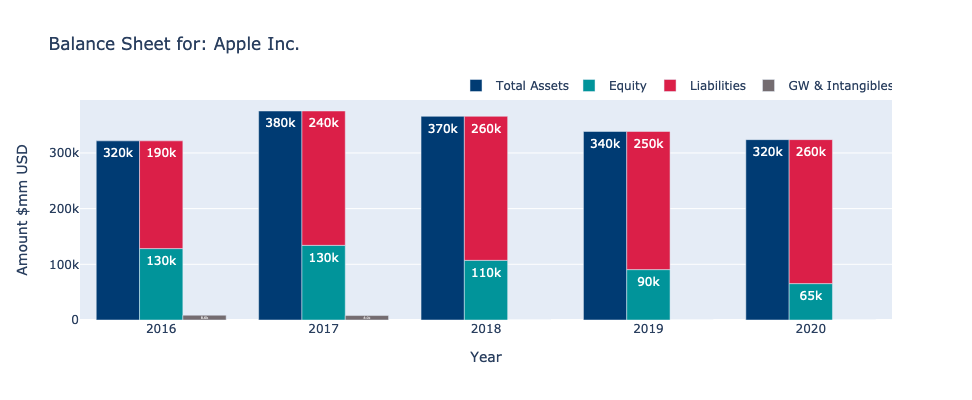

In [47]:
# [Graph] Balance Sheet total USD

fig = go.Figure(data=[
    go.Bar(name='Total Assets',
           x=graph_df["Date"],
           y=graph_df['Total Assets'],
           marker_color='#003B73',
           offsetgroup=0,
           ),
    go.Bar(name='Equity',
           x=graph_df["Date"],
           y=graph_df['SH Equity'],
           marker_color='#01949a',
           offsetgroup=1,
           ),
    go.Bar(name='Liabilities',
           x=graph_df["Date"],
           y=graph_df['Total Liab'],
           marker_color='#db1f48',
           offsetgroup=1,
           base=graph_df['SH Equity']
           ),
    go.Bar(name='GW & Intangibles',
           x=graph_df["Date"],
           y=graph_df['GW_&_IntAssets'],
           marker_color='#746C70',
           offsetgroup=2,
           )
    ])

fig.update_layout(barmode='group',  # group or stack
                  title=str('Balance Sheet for: '+company_name),
                  xaxis_title='Year',
                  yaxis_title='Amount $mm USD',
                  legend=dict(orientation="h", yanchor="bottom", y=1.0, xanchor="right", x=1),
                  width=800, height=400)

fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')

fig.show()

fig.write_image("images/output/bs.png", scale=2)

<a id="bs_percentage"></a>
### [Graph] Balance Sheet percentage amount [*](#index)

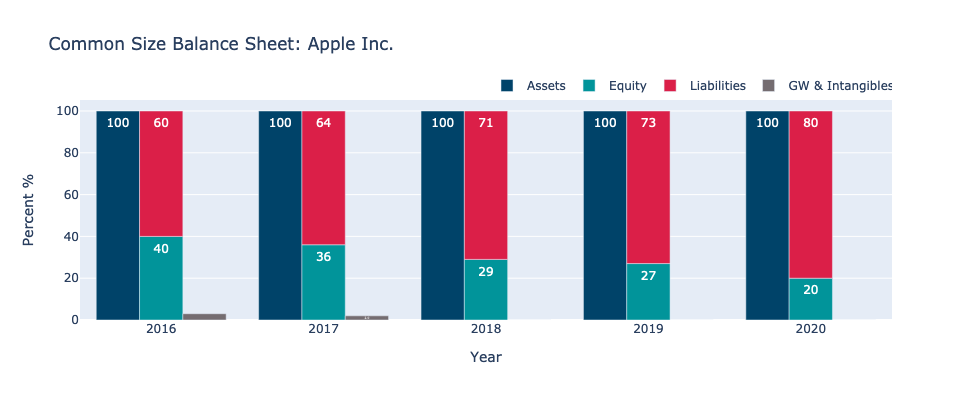

In [48]:
# [Graph] Balance Sheet percentage amount

fig = go.Figure(data=[
    go.Bar(name='Assets',
           x=graph_df["Date"],
           y=(graph_df['Total Assets']/graph_df['Total Assets'])*100,
           marker_color='#004369',
           offsetgroup=0,
           ),
    go.Bar(name='Equity',
           x=graph_df["Date"],
           y=graph_df['tot_equity_perc'],
           marker_color='#01949a',
           offsetgroup=1,
           ),
    go.Bar(name='Liabilities',
           x=graph_df["Date"],
           y=graph_df['tot_liability_perc'],
           marker_color='#db1f48',
           offsetgroup=1,
           base=graph_df['tot_equity_perc']
           ),
    go.Bar(name='GW & Intangibles',
           x=graph_df["Date"],
           y=graph_df['tot_intang_equity_perc'],
           marker_color='#746C70',
           offsetgroup=2
           )
    ])
fig.update_layout(barmode='group',  # group or stack
                  title=str('Common Size Balance Sheet: '+company_name),
                  xaxis_title='Year',
                  yaxis_title='Percent %',
                  legend=dict(orientation="h", yanchor="bottom", y=1.0, xanchor="right", x=1),
                  width=800, height=400)

fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')

fig.show()

fig.write_image("images/output/cs_bs.png", scale=2)

<a id="is_total"></a>
### [Graph] Income Statement USD amount [*](#index)

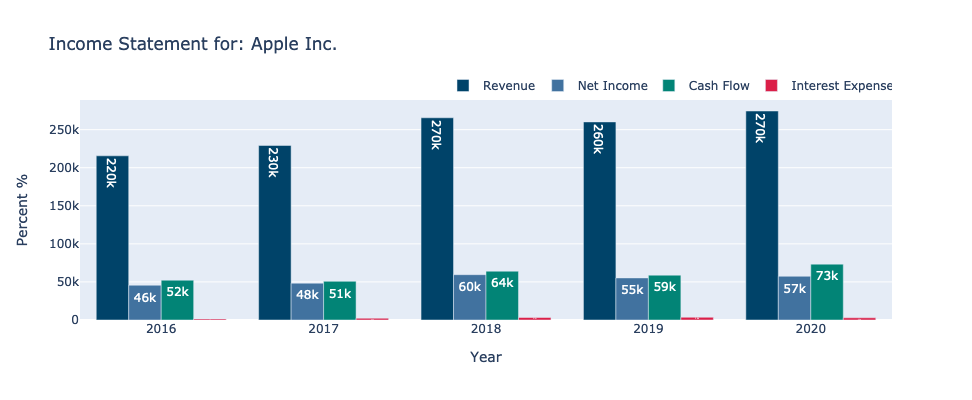

In [49]:
# [Graph] Income Statement USD amount graph

fig = go.Figure(data=[
    go.Bar(name='Revenue',
           x=graph_df["Date"],
           y=graph_df['Revenue'],
           marker_color='#004369'
           ),
    go.Bar(name='Net Income',
           x=graph_df["Date"],
           y=graph_df['Net Income'],
           marker_color='#41729f'
           ),
    go.Bar(name='Cash Flow',
           x=graph_df["Date"],
           y=graph_df['FCF'],
           marker_color='#028476'
           ),
    go.Bar(name='Interest Expense',
           x=graph_df["Date"],
           y=graph_df['Interest Expense'],
           marker_color='#DB1F48'
           )
    ])

fig.update_layout(barmode='group',  # group or stack
                  title=str('Income Statement for: '+company_name),
                  xaxis_title='Year',
                  yaxis_title='Percent %',
                  legend=dict(orientation="h", yanchor="bottom", y=1.0, xanchor="right", x=1),
                  width=800, height=400)

fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')

fig.show()

fig.write_image("images/output/is.png", scale=2)

<a id="is_percentage"></a>
### [Graph] Income Statement percentage amount [*](#index)


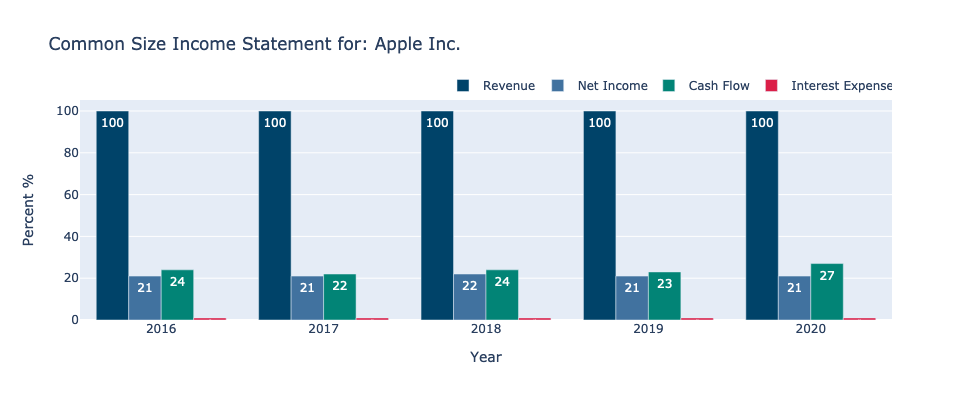

In [50]:
# [Graph] Income Statement percentage amount

fig = go.Figure(data=[
    go.Bar(name='Revenue', 
           x=graph_df["Date"], 
           y=graph_df['Revenue_perc'],
           marker_color='#004369'
          ),
    go.Bar(name='Net Income', 
           x=graph_df["Date"], 
           y=graph_df['Net_income_perc'], 
           marker_color='#41729f'
          ),
    go.Bar(name='Cash Flow', 
           x=graph_df["Date"], 
           y=graph_df['FCF_perc'],
           marker_color='#028476'           
          ), 
    go.Bar(name='Interest Expense',
           x=graph_df["Date"],
           y=graph_df['Int_exp_perc'],
           marker_color='#DB1F48'
           )
    ])

fig.update_layout(barmode='group', # group or stack
                  title = str('Common Size Income Statement for: '+company_name), 
                  xaxis_title = 'Year', 
                  yaxis_title = 'Percent %',
                  legend=dict(orientation="h", yanchor="bottom", y=1.0, xanchor="right", x=1),
                 width=800, height=400) 

fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')

fig.show()

fig.write_image("images/output/cs_is.png", scale=2)

<a id="CF_graph"></a>
### Cash Flow Statement Graph [*](#index)

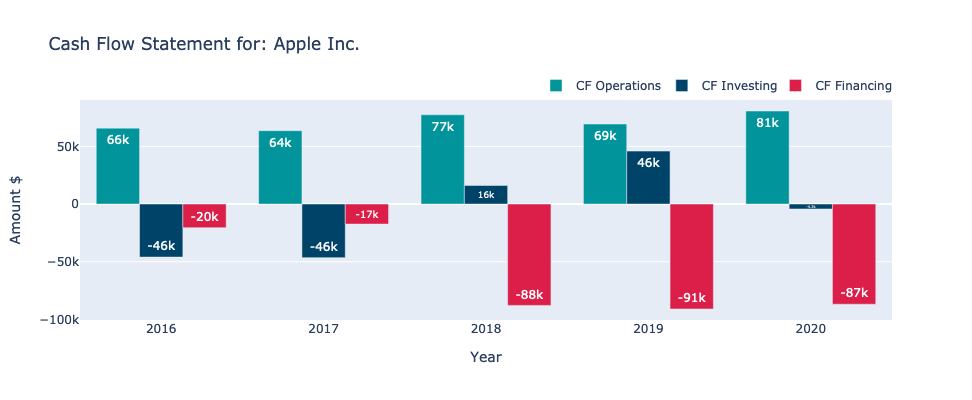

In [51]:
# Cash Flow Statment

fig = go.Figure(data=[
        go.Bar(name='CF Operations',
               x=graph_df["Date"],
               y=graph_df['CF Operations'],
               marker_color='#01949A',
               offsetgroup=2
               ),
        go.Bar(name='CF Investing',
               x=graph_df["Date"],
               y=graph_df['CF Investing'],
               marker_color='#004369',
               offsetgroup=3,
               ),
        go.Bar(name='CF Financing',
               x=graph_df["Date"],
               y=graph_df['CF Financing'],
               marker_color='#DB1F48',
               offsetgroup=4,
               )
    ])

fig.update_layout(barmode='group',  # group or stack
                  title=str('Cash Flow Statement for: '+company_name),
                  xaxis_title='Year',
                  yaxis_title='Amount $',
                  legend=dict(orientation="h", yanchor="bottom", y=1.0, xanchor="right", x=1),
                  width=800, height=400)

fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')

fig.show()

fig.write_image("images/output/cash_flow.png", scale=2)

<a id="equity_uses"></a>
### Equity distribution, reinvestment, and debt payment graph [*](#index)

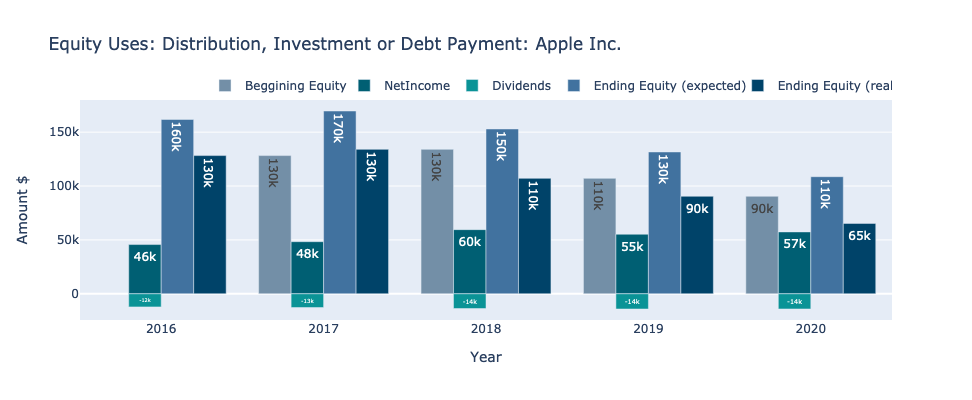

In [52]:
# Equity distribution, reinvestment, and debt payment graph

fig = go.Figure(data=[
        go.Bar(name='Beggining Equity',
           x=graph_df["Date"], 
           y=graph_df['LY_Equity'], 
           marker_color='#738fa7',
           offsetgroup=0
          ),
        go.Bar(name='NetIncome',
           x=graph_df["Date"], 
           y=graph_df['Net Income'], 
           marker_color='#005f73',
           offsetgroup=1,
          ),
        go.Bar(name='Dividends',
           x=graph_df["Date"], 
           y=graph_df['Dividends Paid'], 
           marker_color='#0a9396',
           offsetgroup=1,
          ),
        go.Bar(name='Ending Equity (expected)',
           x=graph_df["Date"], 
           y=graph_df['SH Equity']+graph_df['Net Income']+graph_df['Dividends Paid'],
           marker_color='#41729f',
           offsetgroup=2
          ),
        go.Bar(name='Ending Equity (real)',
           x=graph_df["Date"], 
           y=graph_df['SH Equity'],
           marker_color='#004369',
           offsetgroup=3
          )
    ])

fig.update_layout(barmode='group', # group or stack
                  title = str('Equity Uses: Distribution, Investment or Debt Payment: '+company_name), 
                  xaxis_title = 'Year', 
                  yaxis_title = 'Amount $',
                  legend=dict(orientation="h", yanchor="bottom", y=1.0, xanchor="right", x=1),
                  width=800, height=400)

fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')

fig.show()

fig.write_image("images/output/equity_uses.png", scale=2)

In [53]:
# Check the values in the dataframe vs the graph
graph_df[["Date", "LY_Equity", "Net Income", "Dividends Paid", "SH Equity"]]

,Date,LY_Equity,Net Income,Dividends Paid,SH Equity
0,2016,NaN,45687.0,-12150.0,128249.0
1,2017,128249.0,48351.0,-12769.0,134047.0
2,2018,134047.0,59531.0,-13712.0,107147.0
3,2019,107147.0,55256.0,-14119.0,90488.0
4,2020,90488.0,57411.0,-14081.0,65339.0


<a id="pdf_table"></a>
### Creating a new dataframe for the PDF Table Output [*](#index)

We will use the fundamentals_financials_df to create financial statements.

We will create the following:
- Income Statement (Regular)
- Income Statement (Common Size)
- Balance Sheet (Regular)
- Balance Sheet (Common Size)
- Cash flow statement

We will save the output as a PNG file to add later to the PDF file

- Metrics
- Ratios

In [54]:
# Extracting variable information we will use later
company_symbol = profile_df.at[0,'symbol']
company_name = profile_df.at[0,'companyName']
company_description = Profile[0]['description']

<a id="table_is_df"></a>
### [table_is_df] Income Statement Dataframe [*](#index)

In [55]:
fundamentals_financials_df

,WA ShsOut,WA ShsOutDil,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,Net Income,EPS,Interest Expense,Cash,Cur Assets,LT Assets,GW_&_IntAssets,Total Assets,Cur Liab,LT Liab,Total Liab,SH Equity,CF Operations,CF Investing,CF Financing,CAPEX,FCF,Dividends Paid,cashAtBeginningOfPeriod,cashAtEndOfPeriod
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020,17352.119,17528.214,274515.0,104956.0,18752.0,38668.0,66288.0,57411.0,3.3100,2873.0,90943.0,143713.0,180175.0,0.0,323888.0,105392.0,153157.0,258549.0,65339.0,80674.0,-4289.0,-86820.0,-7309.0,73365.0,-14081.0,50224.0,39789.0
2019,18471.336,18595.652,260174.0,98392.0,16217.0,34462.0,63930.0,55256.0,2.9925,3576.0,100557.0,162819.0,175697.0,0.0,338516.0,105718.0,142310.0,248028.0,90488.0,69391.0,45896.0,-90976.0,-10495.0,58896.0,-14119.0,25913.0,50224.0
2018,19821.508,20000.436,265595.0,101839.0,14236.0,30941.0,70898.0,59531.0,3.0025,3240.0,66301.0,131339.0,234386.0,0.0,365725.0,116866.0,141712.0,258578.0,107147.0,77434.0,16066.0,-87876.0,-13313.0,64121.0,-13712.0,20289.0,25913.0
2017,20868.968,21006.768,229234.0,88186.0,11581.0,26842.0,61344.0,48351.0,2.3175,2323.0,74181.0,128645.0,246674.0,8015.0,375319.0,100814.0,140458.0,241272.0,134047.0,63598.0,-46446.0,-17347.0,-12795.0,50803.0,-12769.0,20484.0,20289.0
2016,21883.280,22001.124,215639.0,84263.0,10045.0,24239.0,60024.0,45687.0,2.0875,1456.0,67155.0,106869.0,214817.0,8620.0,321686.0,79006.0,114431.0,193437.0,128249.0,65824.0,-45977.0,-20483.0,-13548.0,52276.0,-12150.0,21120.0,20484.0


In [56]:
# Income Statement Dataframe
# Creating a new dataframe for the PDF Table Output

# Copy financials dataframe
table_is_df = fundamentals_financials_df.copy(deep=True)

# Drop non income statement variables
table_is_df.drop(['Cash', 'Cur Assets', 'LT Assets', 'GW_&_IntAssets',
                  'Total Assets', 'Cur Liab', 'LT Liab', 'Total Liab',
                  'SH Equity', 'CF Operations', 'CF Investing', 'CF Financing',
                  'CAPEX', 'FCF', 'Dividends Paid', 'cashAtBeginningOfPeriod',
                  'cashAtEndOfPeriod', 'WA ShsOut', 'WA ShsOutDil', 'EPS',
                  ], axis=1, inplace=True)

# Reorder Columns
table_is_df = table_is_df[['Revenue', 'Gross Profit','Op Expenses',
                           'Op Income', 'Net Income', 'R&D Expenses',
                           'Interest Expense']]

# Sort descending
table_is_df.sort_index(ascending=True, inplace=True)

# Copy dataframe to create common size income statement
table_cs_is_df = table_is_df.copy(deep=True)

# Format Columns: Remove decimals, include commas and turn into string.
is_columns = ['Revenue', 'Gross Profit', 'Op Expenses', 'Op Income',
              'Net Income', 'R&D Expenses', 'Interest Expense']

for column_name in is_columns:
    table_is_df[column_name] = pd.Series(["{0:,.0f}".format(val) for val in table_is_df[column_name]], index=table_is_df.index)

# Transpose the data
table_is_df = table_is_df.transpose()

# Save the data as an image:
table_is_df.dfi.export('images/output/is_table.png', table_conversion='matplotlib')

# Print table name
print("Income Statement")

# Show table
table_is_df


Income Statement


Date,2016,2017,2018,2019,2020
Revenue,"215,639","229,234","265,595","260,174","274,515"
Gross Profit,"84,263","88,186","101,839","98,392","104,956"
Op Expenses,"24,239","26,842","30,941","34,462","38,668"
Op Income,"60,024","61,344","70,898","63,930","66,288"
Net Income,"45,687","48,351","59,531","55,256","57,411"
R&D Expenses,"10,045","11,581","14,236","16,217","18,752"
Interest Expense,"1,456","2,323","3,240","3,576","2,873"


<a id="table_cs_is_df"></a>
### [table_cs_is_df] Common Size Income Statement Dataframe [*](#index)

In [57]:
# Common Size Income Statement Dataframe
# Creating a new dataframe for the PDF Table Output

# Check initial data type
#print("Data type: "+str(table_cs_is_df.dtypes))

# Transform the values to Common Size (Percentage of Revenue)
# Revenue must be the last item on the list
cs_is_columns = ['Gross Profit', 'Op Expenses', 'Op Income', 'Net Income',
                 'R&D Expenses', 'Interest Expense', 'Revenue']

# Transform values to percentages
for column_name in cs_is_columns:
    table_cs_is_df[column_name] = round(((table_cs_is_df[column_name]/table_cs_is_df['Revenue'])*100), 0)

# Transform percentages to string and format to include % sybol.
for column_name in cs_is_columns:
    table_cs_is_df[column_name] = pd.Series(["{0:.0f}%".format(val) for val in table_cs_is_df[column_name]], index=table_cs_is_df.index)

# Check final data type
#print("Data type: "+str(table_cs_is_df.dtypes))

# Transpose the data
table_cs_is_df = table_cs_is_df.transpose()

# Save the data as an image:
table_cs_is_df.dfi.export('images/output/cs_is_table.png', table_conversion='matplotlib')

# Print table name
print("Common Size Income Statement")

table_cs_is_df

Common Size Income Statement


Date,2016,2017,2018,2019,2020
Revenue,100%,100%,100%,100%,100%
Gross Profit,39%,38%,38%,38%,38%
Op Expenses,11%,12%,12%,13%,14%
Op Income,28%,27%,27%,25%,24%
Net Income,21%,21%,22%,21%,21%
R&D Expenses,5%,5%,5%,6%,7%
Interest Expense,1%,1%,1%,1%,1%


<a id="table_bs_df"></a>
### [table_bs_df] Balance Sheet Dataframe [*](#index)

In [61]:
# Balance Sheet Dataframe
# Creating a new dataframe for the PDF Table Output

# Copy financials dataframe
table_bs_df = fundamentals_financials_df.copy(deep=True)


# Drop non balance sheet variables
table_bs_df.drop(['WA ShsOut', 'WA ShsOutDil', 'Revenue', 'Gross Profit', 'R&D Expenses',
                  'Op Expenses', 'Op Income', 'Net Income', 'EPS', 'CF Operations',
                  'CF Investing', 'CF Financing', 'CAPEX', 'FCF',  'Cash',
                  'Dividends Paid', 'cashAtBeginningOfPeriod', 'cashAtEndOfPeriod',
                  'GW_&_IntAssets','Interest Expense'
                  ], axis=1, inplace=True)

# Sort descending
table_bs_df.sort_index(ascending=True, inplace=True)

# Copy dataframe to create common size balance sheet
table_cs_bs_df = table_bs_df.copy(deep=True)

# Columns to format
bs_columns = ['Cur Assets', 'LT Assets','Total Assets',
              'Cur Liab', 'LT Liab', 'Total Liab', 
              'SH Equity']

# Format Columns: Remove decimals, include commas and turn into string.
for column_name in bs_columns:
    table_bs_df[column_name] = pd.Series(["{0:,.0f}".format(val) for val in table_bs_df[column_name]], index=table_bs_df.index)

# Transpose the data
table_bs_df = table_bs_df.transpose()

# Save the data as an image:
table_bs_df.dfi.export('images/output/bs_table.png', table_conversion='matplotlib')

# Print table name
print("Balance Sheet")

# Show table
table_bs_df


Balance Sheet


Date,2016,2017,2018,2019,2020
Cur Assets,"106,869","128,645","131,339","162,819","143,713"
LT Assets,"214,817","246,674","234,386","175,697","180,175"
Total Assets,"321,686","375,319","365,725","338,516","323,888"
Cur Liab,"79,006","100,814","116,866","105,718","105,392"
LT Liab,"114,431","140,458","141,712","142,310","153,157"
Total Liab,"193,437","241,272","258,578","248,028","258,549"
SH Equity,"128,249","134,047","107,147","90,488","65,339"


<a id="table_cs_bs_df"></a>
### [table_cs_bs_df] Common Size Balance Sheet Dataframe [*](#index)

In [62]:
# Common Size Balance Sheet Dataframe
# Creating a new dataframe for the PDF Table Output

# Check initial data type
#print("Data type: "+str(table_cs_bs_df.dtypes))

# Transform the values to Common Size (Percentage of Assets)
# Total Assets must be the last value in the list
cs_bs_columns = ['Cur Assets', 'LT Assets',
                 'Cur Liab', 'LT Liab', 'Total Liab',
                 'SH Equity', 'Total Assets']

# Transform values to percentages
for column_name in cs_bs_columns:
    table_cs_bs_df[column_name] = round(((table_cs_bs_df[column_name]/table_cs_bs_df['Total Assets'])*100), 0)


# Transform percentages to string and format as percentage
for column_name in cs_bs_columns:
    table_cs_bs_df[column_name] = pd.Series(["{0:.0f}%".format(val) for val in table_cs_bs_df[column_name]], index=table_cs_bs_df.index)


# Check final data type
#print("Data type: "+str(table_cs_is_df.dtypes))

# Transpose the data
table_cs_bs_df = table_cs_bs_df.transpose()

# Save the data as an image:
table_cs_bs_df.dfi.export('images/output/cs_bs_table.png', table_conversion='matplotlib')

# Print table name
print("Common Size Balance Sheet")
table_cs_bs_df

Common Size Balance Sheet


Date,2016,2017,2018,2019,2020
Cur Assets,33%,34%,36%,48%,44%
LT Assets,67%,66%,64%,52%,56%
Total Assets,100%,100%,100%,100%,100%
Cur Liab,25%,27%,32%,31%,33%
LT Liab,36%,37%,39%,42%,47%
Total Liab,60%,64%,71%,73%,80%
SH Equity,40%,36%,29%,27%,20%


<a id="table_cf_df"></a>
### [table_cf_df] Cash Flow Statement Dataframe [*](#index)

In [63]:
# Cash Flow Statement Dataframe
# Creating a new dataframe for the PDF Table Output

# Copy financials dataframe
table_cf_df = fundamentals_financials_df.copy(deep=True)


# Drop non cash flow statement variables
table_cf_df.drop(['WA ShsOut', 'WA ShsOutDil', 'Revenue', 'Gross Profit', 'R&D Expenses',
                  'Op Expenses', 'Op Income', 'Net Income', 'EPS', 'Cash',
                  'Cur Assets', 'LT Assets', 'GW_&_IntAssets',
                  'Total Assets', 'Cur Liab', 'LT Liab', 'Total Liab',
                  'SH Equity', 'Dividends Paid', 'CAPEX', 'FCF', 'Interest Expense'
                  ], axis=1, inplace=True)

# Add change in cash column
table_cf_df['Change in Cash'] = table_cf_df['cashAtEndOfPeriod'] - table_cf_df['cashAtBeginningOfPeriod']

# Sort descending
table_cf_df.sort_index(ascending=True, inplace=True)

# Copy dataframe for Common Size cashflow statement
table_cs_cf_df = table_cf_df.copy(deep=True)

# Columns to format
cf_columns = ['CF Operations', 'CF Investing', 'CF Financing',
              'cashAtBeginningOfPeriod', 'cashAtEndOfPeriod', 'Change in Cash']

# Format Columns: Remove decimals, include commas and turn into a string.
for column_name in cf_columns:
    table_cf_df[column_name] = pd.Series(["{0:,.0f}".format(val) for val in table_cf_df[column_name]], index=table_cf_df.index)

# Transpose the data
table_cf_df = table_cf_df.transpose()

# Save the data as an image:
table_cf_df.dfi.export('images/output/cf_table.png', table_conversion='matplotlib')

# Print table name
print("Cash Flow Statement")

# Show table
table_cf_df

Cash Flow Statement


Date,2016,2017,2018,2019,2020
CF Operations,"65,824","63,598","77,434","69,391","80,674"
CF Investing,"-45,977","-46,446","16,066","45,896","-4,289"
CF Financing,"-20,483","-17,347","-87,876","-90,976","-86,820"
cashAtBeginningOfPeriod,"21,120","20,484","20,289","25,913","50,224"
cashAtEndOfPeriod,"20,484","20,289","25,913","50,224","39,789"
Change in Cash,-636,-195,"5,624","24,311","-10,435"


<a id="table_metrics_df"></a>
### [table_metrics_df] Metrics Dataframe [*](#index)

In [64]:
# Metrics Dataframe
# Creating a new dataframe for the PDF Table Output

# Filter the fundamentals_metrics_df
fundamentals_metrics_filtered_df = pd.DataFrame(fundamentals_metrics_df, columns=['Mkt Cap',
                                                                                  'Debt to Assets',
                                                                                  'Debt to Equity'])

# Filted the fundamentals_ratios_df
fundamentals_ratios_filtered_df = pd.DataFrame(fundamentals_ratios_df, columns=['Gross Profit Margin',
                                                                                'Op Margin',
                                                                                'Int Coverage',
                                                                                'Net Profit Margin',
                                                                                'Dividend Yield',
                                                                                'Current Ratio',
                                                                                'Operating Cycle',
                                                                                'Days of AP Outstanding',
                                                                                'Cash Conversion Cycle',
                                                                                'ROA',
                                                                                'ROE',
                                                                                'PE',
                                                                                'PS',
                                                                                'PB',
                                                                                'PCF',
                                                                                'EaringsYield'])

# Filted the fundamentals_financials_df
fundamentals_financials_filtered_df = pd.DataFrame(fundamentals_financials_df, columns=['WA ShsOut',
                                                                                        'WA ShsOutDil',
                                                                                        'EPS',
                                                                                        'CAPEX',
                                                                                        'FCF'])

# Concatenate the dataframes into a single dataframe
table_metrics_df = pd.concat([fundamentals_metrics_filtered_df,
                              fundamentals_ratios_filtered_df,
                              fundamentals_financials_filtered_df
                              ], axis=1)

# Substitute NaN values for float
table_metrics_df.fillna(.99, inplace=True)

# Convert all values to floats (in case there are empty string values)
table_metrics_df = table_metrics_df.astype(float)

# Sort descending
table_metrics_df.sort_index(ascending=True, inplace=True)

# Check data type
#print("Data type: "+str(table_metrics_df.dtypes))

# Columns to format
integer_columns = ['Mkt Cap', 'PE', 'PS', 'PB', 'PCF', 'Int Coverage', 'Operating Cycle', 'Days of AP Outstanding',
                   'Cash Conversion Cycle', 'WA ShsOut', 'WA ShsOutDil', 'EPS', 'CAPEX', 'FCF']

percentage_columns = ['Debt to Assets', 'Debt to Equity', 'Gross Profit Margin', 'Op Margin', 'Net Profit Margin',
                      'Dividend Yield', 'Current Ratio', 'ROA', 'ROE','EaringsYield' ]

# Format Columns: Remove decimals, include commas and turn into a string.
for column_name in integer_columns:
    table_metrics_df[column_name] = pd.Series(["{0:,.0f}".format(val) for val in table_metrics_df[column_name]], index=table_metrics_df.index)

for column_name in percentage_columns:
    table_metrics_df[column_name] = pd.Series(["{0:.0f}%".format(val*100) for val in table_metrics_df[column_name]], index=table_metrics_df.index)

# Re index columns to order numbers first and percentages second
table_metrics_df = table_metrics_df.reindex(columns=integer_columns+percentage_columns)

# Check datatypes
#print("Data type: "+str(table_metrics_df.dtypes))

# Transpose the data
table_metrics_df = table_metrics_df.transpose()

# Save the data as an image:
table_metrics_df.dfi.export('images/output/main_metrics_table.png', table_conversion='matplotlib')

# Print Table Name
print("Main Metrics")

# Show table
table_metrics_df

Main Metrics


Date,2016,2017,2018,2019,2020
Mkt Cap,"643,642","869,819","1,051,729","1,150,072","1,996,361"
PE,14,18,18,21,35
PS,3,4,4,4,7
PB,5,6,10,13,31
PCF,12,17,16,20,27
Int Coverage,41,26,22,18,23
Operating Cycle,33,69,76,74,59
Days of AP Outstanding,104,127,125,104,91
Cash Conversion Cycle,-71,-58,-48,-31,-33
WA ShsOut,"21,883","20,869","19,822","18,471","17,352"


In [65]:
#### Otras funciones que use anteriormente  y que tal ves use despues####

# Transform the DataFrame to include index of Date
#table = table.reset_index()

# Fill NA values as zeroes in table
#table_df['Dividend Yield'].fillna(0,inplace=True)

# Transform Date to string
#table['Date'] = table['Date'].astype(str)

# Transform the DataFrame to include index of Date
#table = table.reset_index()

#output.to_csv('temp.csv', index = True)


<a id="export_pdf"></a>
### Exporting as a PDF file[*](#index)

In [66]:
# Export to PDF

# Border changes for editing
border_chg = 0 # 1 = show, 0 = hide

In [67]:
# FPDF Notes:

# self.cel(ln=Position after call = 0=Right, 1=NextLine, 2=Below)
# self.cel(w=0) # Uses all available space
# fpdf.image(name, x = possition, y = possition, w = 0, h = 0, type = '', link = '')
# If no w or h is provided, its calculated automatically.

<a id="formating_pdf"></a>
#### Formating data for the PDF [*](#index)
[PDF section start](#export_pdf)

In [68]:
# Formating PDF Data

# Get variable values
today = dt.date.today()
company_symbol = profile_df.at[0, 'symbol']
company_name = profile_df.at[0, 'companyName']
company_description = Profile[0]['description']
currency = Profile[0]['currency']
isin = Profile[0]['isin']
cusip = Profile[0]['cusip']
exchange = Profile[0]['exchangeShortName']
industry = Profile[0]['industry']
website = Profile[0]['website']
sector = Profile[0]['sector']
country = Profile[0]['country']
employees = Profile[0]['fullTimeEmployees']
company_image = Profile[0]['image']
ipo_date = Profile[0]['ipoDate']
ceo = Profile[0]['ceo']

# Change employee number format
employees = float(employees)
employees = ('{:,.0f}'.format(employees))

# Create a tuple from the values
data = (
    ("Company Name:", company_name),
    ("Company Symbol:", company_symbol),
    ("Currency:", currency),
    ("ISIN:", isin,),
    ("CUSIP:", cusip),
    ("Exchange:", exchange),
    ("Industry:", industry),
    ("Sector:", sector),
    ("Country:", country),
    ("No. Employees:", employees),
    ("IPO Date:", ipo_date),
    ("CEO:", ceo)
    )

<a id="defining_classes_pdf"></a>
#### Defining Classes [*](#index)
[PDF section start](#export_pdf)

In [69]:
# Defining Classes

class PDF(FPDF):
    def header(self):
        # Logo
        self.image('images/input/BS-Logo.png', x=12, y=12, w=30)
        # Analysis date
        self.ln(4)
        self.cell(155)
        self.set_font('Helvetica', 'BI', 8)
        self.cell(w=35, h=5,
                  txt="Created : "+today.strftime("%d-%b-%Y"),
                  border=border_chg, ln=0, align='R', fill=False, link='')
        self.ln(4)
        # Company Name
        self.ln(12)
        self.cell(55)
        self.set_font('Helvetica', 'B', 12)
        self.cell(w=100, h=5,
                  txt=(" Company Analysis: "+company_name),
                  border=border_chg, ln=1, align='C')

    def footer(self):
        # Position at 1.5 cm from bottom
        self.set_y(-20)
        # Information Disclaimer
        self.set_font('Helvetica', 'I', 8)
        self.cell(w=0, h=4,
                  txt='*Data provided by Financial Modeling Prep',
                  border=border_chg, ln=1, align='R')
        self.ln(1)
        # Page number
        self.set_font('Helvetica', 'BI', 10)
        self.cell(w=0, h=5,
                  txt='Page ' + str(self.page_no()) + ' of {nb}',
                  border=border_chg, ln=0, align='C')

<a id="class_instantiation_pdf"></a>
#### Instantiation of Class [*](#index)
[PDF section start](#export_pdf)

In [70]:
# Instantiation of Class
pdf = PDF(orientation="P", unit="mm", format="Letter")

# Document Description
pdf.set_author(author="Pablo Cruz Lemini")
pdf.set_subject(subject="Fundamental Analyisis for "+company_symbol)
pdf.set_keywords("fundamental, analysis,"+company_symbol)

# Add unicode font
pdf.add_font("FreeSans", "", "/Users/portfedh/Library/Fonts/freefont-20120503/FreeSans.ttf", uni=True)
pdf.add_font("FreeSans", "B", "/Users/portfedh/Library/Fonts/freefont-20120503/FreeSansBold.ttf", uni=True)
pdf.set_font('FreeSans', 'B', 11)

<a id="page1_pdf"></a>
#### Page 1: Company Description [*](#index)
[PDF section start](#export_pdf)

In [71]:
# Page 1
pdf.add_page()

# Title
pdf.ln(10)
pdf.cell(14)
pdf.set_font('Helvetica', 'B', 11)
pdf.cell(w=50, h=5, txt="Company Summary:", border=border_chg, ln=1, align='L')
pdf.ln(3)

# Company summary table
pdf.set_font("FreeSans", size=8)
line_height = pdf.font_size * 2
col_width = pdf.epw / 5  # distribute content evenly
for row in data:
    pdf.cell(20)
    for datum in row:
        pdf.multi_cell(col_width, line_height, datum, border=border_chg, ln=3, max_line_height=pdf.font_size)
    pdf.ln(line_height)
pdf.ln(5)

# Company description
pdf.cell(14)
pdf.multi_cell(w=165, h=5,
               txt=company_description,
               border=border_chg,
               align='J',
               fill=False)

# Company image
try:
    pdf.image('images/output/company_image.png', x=100, y=215, h=15)
except Exception:
    pass

<a id="page2_pdf"></a>
#### Page 2: Company Metrics [*](#index)
[PDF section start](#export_pdf)

In [72]:
# Page 2
pdf.add_page()

# Title
pdf.set_font('Helvetica', 'B', 11)
pdf.ln(10)
pdf.cell(w=45, h=5, txt=" Financial Summary:",
         border=border_chg, ln=1, align='L')

# Amount in Millions
pdf.cell(10)
pdf.set_font('Helvetica', 'I', 8)
pdf.cell(w=40, h=5, txt="Amounts in $ USD (Millions)",
         border=border_chg, ln=0, align='L', fill=False, link='')

# Main metrics table
pdf.image('images/output/main_metrics_table.png', x=40, y=62, h=150)


{'data': b'x\x9c\xec\x9dg\x98\xd5D\xdf\xc6\x0fK\xdbe\xa9\xbbK_\x8a\xd2{Q@\x11iJG\x10D\x04\xa4\n\xd2-\x80\xf2\x80"\x02\x82\xf8\xd0D\xac(bC\x14ib/\x88"]\x94GDA\xe9\xbd+\xb8p>\xfb\xde\xd7\xfe_r\xc5\x94I\xce99\xfd\xfe}\xd8\xebd2\xc9\xcc\xdc\x99rO2\xc9\xfa\xfe!\x84\x10B\x08!^\xe0\x8bv\x06\x08!\x84\x10B\x12\x04\xfa*B\x08!\x84\x10o\xa0\xaf"\x84\x10B\x08\xf1\x06\xfa*B\x08!\x84\x10o\xa0\xaf"\x84\x10B\x08\xf1\x06\xfa*B\x08!\x84\x10o\xa0\xaf"\x84\x10B\x08\xf1\x06\xfa*B\x08!\x84\x10o\xa0\xaf"\x84\x10B\x08\xf1\x06\xfa*\x12\x13\xf8\x94D;w\xd1D-\x88K\xad\x14{\xe3Z\xf0p\x8b\x93\x9cD\xbe\xca\x85\xab$\xb1\x04U\r\x07!\xaa\xaa>\xdc\xcd\x19\xacs\x15z\xc1\x08\t\x1d\xcb\xfa\x1dD\x1f\x91`}\x8aZ\x10\xf7Z\x05\xd4\xad\xc4\x8bza\x15Gq\xf2x\xd1\'8\xc2\xaaj@gH$\xa8j8\x08Q\xd5\xd0#\xd8f,\x1c\xa5%$P\xdc\xf4\x17\xa1\x9c\'NQ4u\xf3^\xb3V\x8e=\x82\xe3\x19b\x99\xb0\x8ac\xde\x1b_\xe2\x04M\xc4T\xb5K.!\xa1\xaa\xe1\xc0+U\x03\x8d\xe0\x9c1\x8f\nHHH(\xaal@}D\x82u(\xea>T\xdd\xadXF\xb6<\x95c`l\x12Vq\xec\x92\x8b\x17q\x82\x86U.\x1cP

<a id="page3_pdf"></a>
#### Page 3: Financial Statements [*](#index)
[PDF section start](#export_pdf)

In [73]:
# Page 3
pdf.add_page()

# Title
pdf.set_font('Helvetica', 'B', 11)
pdf.ln(10)
pdf.cell(w=45, h=5, txt=" Financial statements:",
         border=border_chg, ln=1, align='L')

# Amount in Millions
pdf.cell(10)
pdf.set_font('Helvetica', 'I', 8)
pdf.cell(w=40, h=5, txt="Amounts in $ USD (Millions)",
         border=border_chg, ln=0, align='L', fill=False, link='')

# Income Statement Title
pdf.ln(15)
pdf.cell(10)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=30, h=5, txt="Income Statement",
         border=border_chg, ln=0, align='L', fill=False, link='')

# Balance Sheet Title
pdf.ln(50)
pdf.cell(10)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=25, h=5, txt="Balance Sheet",
         border=border_chg, ln=0, align='L', fill=False, link='')

# Cash Flow Statement Title
pdf.ln(70)
pdf.cell(10)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=35, h=5, txt="Cash Flow Statement",
         border=border_chg, ln=0, align='L', fill=False, link='')

# Income Statement image
pdf.image('images/output/is_table.png', x=13, y=70, h=40)

# Common Size Income Statement
pdf.image('images/output/cs_is_table.png', x=120, y=70, h=40)

# Balance Sheet
pdf.image('images/output/bs_table.png', x=13, y=120, h=50)

# Common Size Balance Sheet
pdf.image('images/output/cs_bs_table.png', x=120, y=120, h=50)

# Cash Flow Statement
pdf.image('images/output/cf_table.png', x=45, y=190, h=40)


{'data': b'x\x9c\xed\x9d{\xfcU\xc3\x1a\xffw\xe9~\xbf\xdfK%\x15\xddQ!\'\x95\xa4\x92D\xa7T\x8aJE$\x15\xa1#\x14\xe1\x14\x8a\xc49\x84\\"\xb9\xa4\x10!\xf7$\x84\x08\x11E!\xba\x91\x9c\xfdw\xbf\xcfo?\xbf\xe67\xd6e\xd6\xac\xb5\xd7\xde{}\xeb\xf3\xfe\xa3\xd7w\xcf\x9a5\xf3\xcc3\xcf\xcc|f\xddJ\x1d \x84\x10B\x08I\x00\xa9B\x1b@\x08!\x84\x10\xf2\x7f\xa1(!\x84\x10BH"\xa0(!\x84\x10BH"\xa0(!\x84\x10BH"\xa0(!\x84\x10BH"\xa0(!\x84\x10BH"\xa0(!\x84\x10BH"\xa0(!\x84\x10BH"\xa0(!\x84\x10BH"\xa0(!E\x92\x94\x91B[\x97W\xcc\x1e\xb0t\x8e\xe1h\xd1\xf2p\xae\xbdQ\xb4\xc8\x7fl\xe4\xaa%q@o\xe8d\xe9\r\xf3\xe96%\xf8\x1a\x96e\xc3\x08)\x08\x9eC"\xca\x00(\n\xd3\x87\x01\xb3\x07\xec\x9d\x13j\xeaI\xac\xbbr\xea\rC\xe1\xc9tHN\xbd\x11\xaa\x84$@o\xe8d\xe9\x8d\xec3\x98l\x8b\xbd\xb5\x84\xe4\x01\x9b\xa9!\x9br\x8a\n\x86\xe9\xc0}\xd4\xed\x9c\xc0Y#\xb0\x84D\x91So\xb8\x8f\xd2\x1b\x9e\xf9\xf3\xd1\xb6\xf0\xd0\x1b:qy#l\x06+\xdb\xe2h !\xf9\xc6\x10\xe5\xe1\x06@\xb2\xe7\x8e@\xcc\xf3\xa3y\xea\xf1\xcc\xecYT`bB\xc8\xa97\xfc\xaa;<\xbd\xc1\xd8\xf0,

<a id="page4_pdf"></a>
#### Page 4: Financial Statement Graphs [*](#index)
[PDF section start](#export_pdf)

In [74]:
# Page 4
pdf.add_page()

# Income Statement Graph
pdf.image('images/output/is.png', x=30, y=35, h=80)

# Balance Sheet Graph
pdf.image('images/output/bs.png', x=30, y=105, h=80)

# Cash Flow Statement Graph
pdf.image('images/output/cash_flow.png', x=30, y=175, h=80)


{'data': b'x\x9c\xec\xdd\x0bl\x14g\x9e\xef\xfd\x9d\x19E\xb3\x1a\xadf\xb5z\xf7\xbc\xab\xd5\x1e\xed\xbb:Z\xad^Y\xa3\xd1\x1eM\xb4\xafV\'\xab(\xe7\x8cf\x93=\x8a&R\xb2\xd9\xbc\x87\x9c\xc9a3\xb93\'dI\x88 \x99\x90\xf0B \x90@X\xee\x18c \xdc\x8c\xc1\x01\xcc=6\x17\x87\x8b\xb9\x19\xb0\xb1\xb1\x8d1\x18lc\xf0\xdd\xf8~}\xff\xf8\x81\x87\x87\xaa\xeeru\xbb\xbb\xab\xba\xeb\xfb\xd1O\x08\xaa\xab\xab\xab\xbb\x9f~\xba\x9f?UO\xfd\xc1\x08\x00\x00\x00\x00\x00\x00\xe0c\x7f\xe0\xf5\x0e\x00\x00\x00\x00\x00\x00\x00N(`\x01\x00\x00\x00\x00\x00\xc0\xd7(`\x01\x00\x00\x00\x00\x00\xc0\xd7(`\x01\x00\x00\x00\x00\x00\xc0\xd7(`\x01\x00\x00\x00\x00\x00\xc0\xd7(`\x01\x00\x00\x00\x00\x00\xc0\xd7(`\x01\x00\x00\x00\x00\x00\xc0\xd7(`\x01\x00\x00\x00\x00\x00\xc0\xd7(`\x01\x00\x00\x00\x00\x00\xc0\xd7(`\x01\x00\x00\x00\x00\x00\xc0\xd7(`\x01\x00\x00\x00\x00\x00\xc0\xd7(`\x01\x00\x00\x00\x00\x00\xc0\xd7(`\x01\x00\x00\x00\x00\x00\xc0\xd7(`\x01\x00\x00\x00\x00\x00\xc0\xd7(`\x01\x00\x00\x00\x00\x00\xc0\xd7(`\x01\x00\x00\x00\x00\x00\xc0\x

<a id="page5_pdf"></a>
#### Page 5: Common Size Financial Statement Graphs [*](#index)
[PDF section start](#export_pdf)

In [75]:
# Page 5
pdf.add_page()

# Common Size Income Statement Graph
pdf.image('images/output/cs_is.png', x=30, y=35, h=80)

# Common Size Balance Sheet Graph
pdf.image('images/output/cs_bs.png', x=30, y=105, h=80)

# Common Size Cash Flow Statement Graph
pdf.image('images/output/equity_uses.png', x=30, y=175, h=80)


{'data': b'x\x9c\xec\xbd\xe9oUG\xb6\xf7\x7f_?\x7f\xcay\xdd/\xaft\x7f\xad\xdfO\xad\xee\x17\xad\x1b\xa9\xfb\x89"\xa5\xd5\xf9\xa1t\x92\xce\xa4\x84K\x02\x0f\x81\x84\x04A !\x81\xd0\x860\x04\x02$\x0ca\x9ei \x18\x83\xc3`0v\xc0`0\xc66\x18\x8c\xc1\x18\xb01\x9e\xa7\xf3\xac\xb8\xecEQ{\xf0>\xf39\xf6\xe7\xa3%\x84\xf7\xd9C\xd5\xae\xda\xb5k}w\xd5\xaa\xff\x88\x03\x00\x00\x00\x00\x00\x00\x00\x00\xe41\xff\x91\xeb\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x84\x81\x80\x05\x00\x00\x00\x00\x00\x00\x00\x00y\r\x02\x16\x00\x00\x00\x00\x00\x00\x00\x00\xe45\x08X\x00\x00\x00\x00\x00\x00\x00\x00\x90\xd7 `\x01\x00\x00\x00\x00\x00\x00\x00@^\x83\x80\x05\x00\x00\x00\x00\x00\x00\x00\x00y\r\x02\x16\x00\x00\x00\x00\x00\x00\x00\x00\xe45\x08X\x00\x00\x00\x00\x00\x00\x00\x00\x90\xd7 `\x01\x00\x00\x00\x00\x00\x00\x00@^\x83\x80\x05\x00\x00\x00\x00\x00\x00\x00\x00y\r\x02\x16\x00\x00\x00\x00\x00\x00\x00\x00\xe45\x08X\x00\x00\x00\x00\x00\x00\x00\x00\x90\xd7 `\x01\x00\x00\x00\x00\x00\x00\x00@^\x83\x80\x05\x00\x00\x00\x00\x00\x00\x0

<a id="save_output_pdf"></a>
#### Save Output as PDF [*](#index)
[PDF section start](#export_pdf)

In [76]:
# Save output as PDF
pdf.output(company_symbol+" "+today.strftime("%Y-%m-%d")+".pdf")

[Go to Ticker](#ticker)

[PDF section start](#export_pdf)